In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [3]:
#a)
df = pd.read_csv('kc_house_data.csv')
df.head()
#Hint: read_csv(), head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#b) 

house_categorical_df = df.drop(
    {'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
     'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'}, axis=1)
house_numerical_df = df.drop({'id', 'date', 'waterfront', 'view', 'condition', 'grade', 'zipcode'}, axis=1)

house_categorical_df.head()

,id,date,waterfront,view,condition,grade,zipcode
0,7129300520,20141013T000000,0,0,3,7,98178
1,6414100192,20141209T000000,0,0,3,7,98125
2,5631500400,20150225T000000,0,0,3,6,98028
3,2487200875,20141209T000000,0,0,5,7,98136
4,1954400510,20150218T000000,0,0,3,8,98074


In [5]:
#c)
house_numerical_df.describe().applymap(lambda x: f"{x:0.3f}")

# Not all of them are meaningful, for example information such as mean latitude and longitude, mean renovation year (because
# if the building wasn't renovated there is value 0), as well as count of every variable which is all records numbers,
# these statistics are meaningless

#Hint: Function describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,540088.142,3.371,2.115,2079.900,15106.968,1.494,1788.391,291.509,1971.005,84.402,47.560,-122.214,1986.552,12768.456
std,367127.196,0.930,0.770,918.441,41420.512,0.540,828.091,442.575,29.373,401.679,0.139,0.141,685.391,27304.180
min,75000.000,0.000,0.000,290.000,520.000,1.000,290.000,0.000,1900.000,0.000,47.156,-122.519,399.000,651.000
25%,321950.000,3.000,1.750,1427.000,5040.000,1.000,1190.000,0.000,1951.000,0.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3.000,2.250,1910.000,7618.000,1.500,1560.000,0.000,1975.000,0.000,47.572,-122.230,1840.000,7620.000
75%,645000.000,4.000,2.500,2550.000,10688.000,2.000,2210.000,560.000,1997.000,0.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,9410.000,4820.000,2015.000,2015.000,47.778,-121.315,6210.000,871200.000


## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

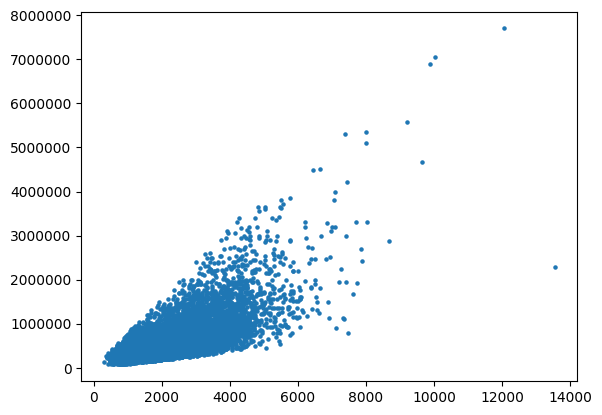

In [15]:
#a)
plt.ticklabel_format(useOffset=False, style='plain')
plt.scatter(df['sqft_living'], df['price'], s=5)

# It is correlated, because as we can see the bigger living space is, the bigger price we have

#Hint plt.scatter

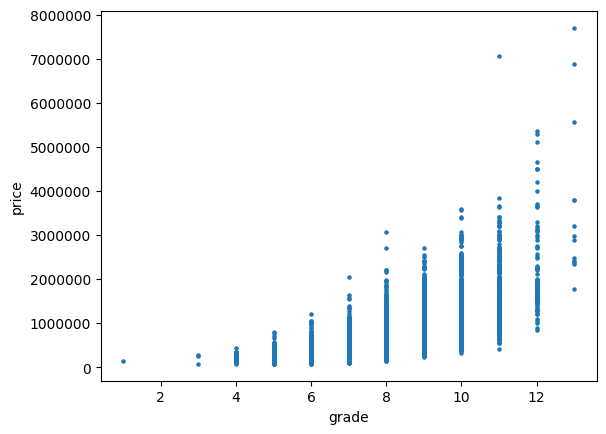

In [7]:
#b)
plt.scatter(x=df['grade'], y=df['price'], s=5)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

# As we can see grade have impact on price, the biggest impact we can see when the grade so between 11 and 12/13.
# Other variables correlated with price, for example: bathrooms and sqft_living

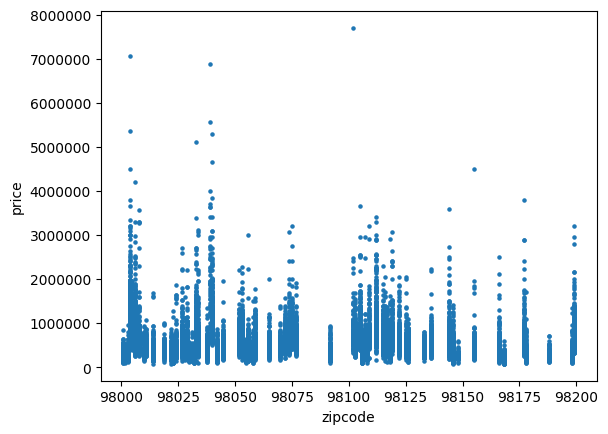

In [8]:
#c)

plt.scatter(x=df['zipcode'], y=df['price'], s=5)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('zipcode')
plt.ylabel('price')
plt.show()

# Chart shows indicative prices of houses in different districts

[]

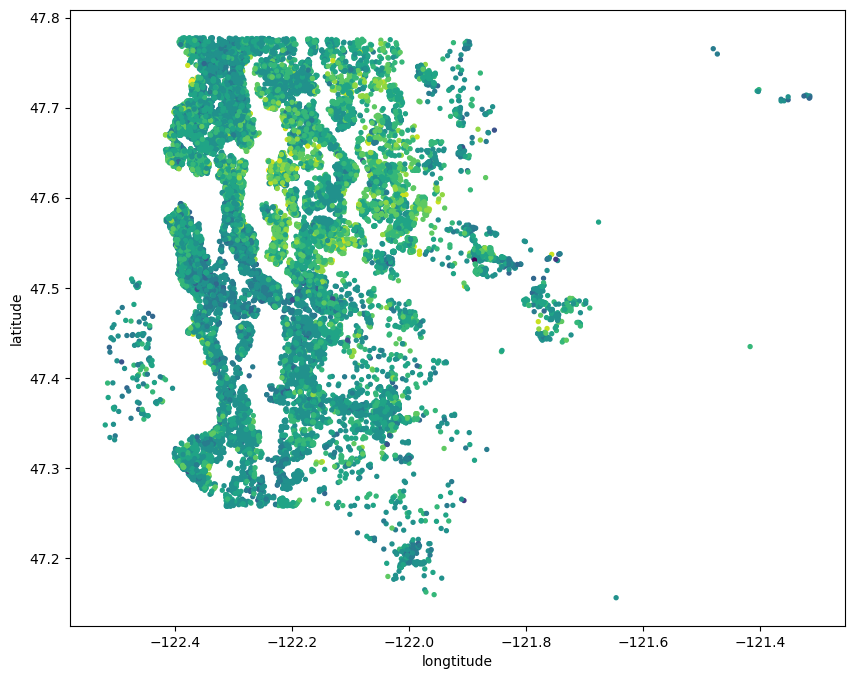

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
plt.xlabel('longtitude')
plt.ylabel('latitude')
plt.ticklabel_format(useOffset=False, style='plain')
plt.scatter(x=df['long'], y=df['lat'], c=df['grade'], marker='o', s=8)
plt.plot()

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

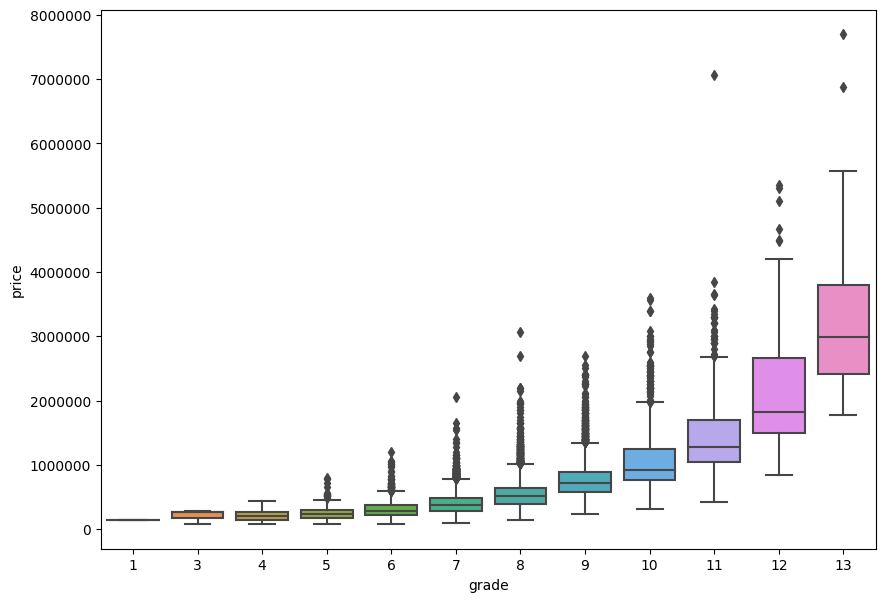

In [10]:
#a)
import seaborn as sb

fig = plt.figure(figsize =(10, 7))
plt.ticklabel_format(useOffset=False, style='plain')
sb.boxplot(x='grade', y='price', data=df)
plt.show()

# This boxplot is similar to the plot in 2b) but this one have more information such as median, minimum and maximum value
# and first and third quartile
#Hint: plt.boxplot

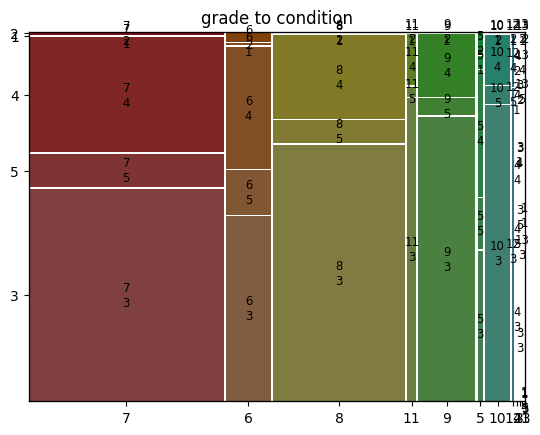

In [11]:
#b)
from statsmodels.graphics.mosaicplot import mosaic

data = pd.DataFrame({'grade' : house_categorical_df['grade'], 'condition' : house_categorical_df['condition']})
mosaic(data, ['grade', 'condition'], title='grade to condition')
plt.show()

## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [16]:
#a)
new_df = df.loc[(df['bedrooms'] == 3) & (df['bathrooms'] == 2) & (df['floors'] == 2)]
new_df.describe().applymap(lambda x: f"{x:0.3f}")
#Hint: pandas.DataFrame.loc

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000
mean,4397176698.513,514498.610,3.000,2.000,1850.279,23678.948,2.000,0.006,0.357,3.435,7.552,1717.422,132.857,1969.779,284.864,98085.578,47.567,-122.247,1802.338,17545.123
std,2849813488.758,249766.084,0.000,0.000,547.585,83324.025,0.000,0.081,0.919,0.713,0.833,527.474,248.093,34.654,700.057,48.809,0.143,0.151,453.211,40404.135
min,7600057.000,209000.000,3.000,2.000,1020.000,700.000,2.000,0.000,0.000,2.000,6.000,720.000,0.000,1900.000,0.000,98001.000,47.195,-122.519,850.000,886.000
25%,2060900547.500,376975.000,3.000,2.000,1452.500,3414.750,2.000,0.000,0.000,3.000,7.000,1402.500,0.000,1942.250,0.000,98038.500,47.499,-122.362,1452.500,4020.000
50%,3630010030.000,464000.000,3.000,2.000,1700.000,5868.500,2.000,0.000,0.000,3.000,7.000,1625.000,0.000,1984.500,0.000,98103.000,47.585,-122.299,1725.000,6278.000
75%,7184073763.750,589462.500,3.000,2.000,2127.500,10800.250,2.000,0.000,0.000,4.000,8.000,1977.500,207.500,1997.500,0.000,98122.000,47.682,-122.149,2117.500,10392.250
max,9829200325.000,1755000.000,3.000,2.000,3650.000,843309.000,2.000,1.000,4.000,5.000,10.000,3650.000,1120.000,2014.000,2014.000,98199.000,47.777,-121.709,3170.000,273992.000


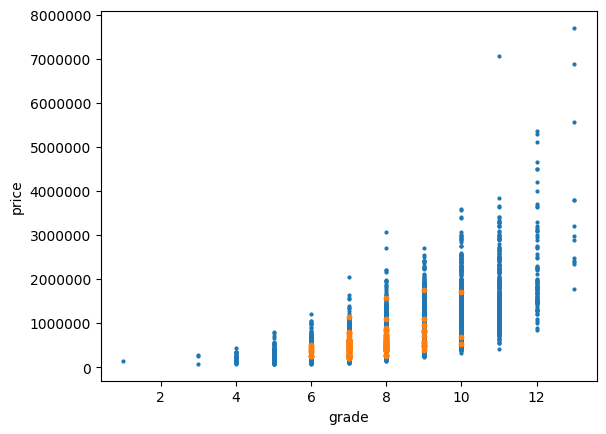

In [13]:
#b)

plt.scatter(x=df['grade'], y=df['price'], s=4)
plt.scatter(x=new_df['grade'], y=new_df['price'], s=10)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

# As we can see apartments with 3 bedrooms, 2 bathrooms and 2 floors have grades between 6 and 10

In [14]:
#c)
pd.options.mode.chained_assignment = None
new_df['new'] = (new_df['price'] / new_df['sqft_living']).round(3)
new_df.sort_values(by='new').head()
#Hint: .loc, .sort_values(), .index

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,new
9704,7452500565,20140829T000000,260000.0,3,2.0,2710,5000,2.0,0,0,...,2710,0,1951,0,98126,47.5188,-122.373,850,5000,95.941
11258,7937600262,20140710T000000,379900.0,3,2.0,3110,44967,2.0,0,0,...,3020,90,1999,0,98058,47.4343,-122.082,2150,44967,122.154
19880,3832050860,20150319T000000,210000.0,3,2.0,1580,4961,2.0,0,0,...,1580,0,2006,0,98042,47.3338,-122.053,2280,5000,132.911
16014,5104450440,20141113T000000,252500.0,3,2.0,1810,10684,2.0,0,0,...,1810,0,1987,0,98058,47.4619,-122.153,2140,9657,139.503
20906,3355400242,20141028T000000,274900.0,3,2.0,1936,6612,2.0,0,0,...,1936,0,2014,0,98001,47.2602,-122.246,1620,21600,141.994
